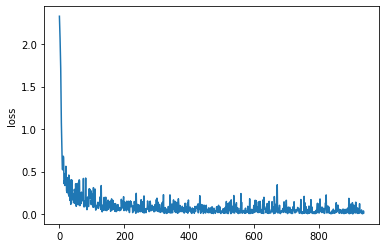

checking accuracy on trainig data
accuracy : 98.71% 
checking accuracy on test data
accuracy : 98.34% 


<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn.modules import loss
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt

class cnn(nn.Module):
    def __init__(self,in_channels=1,num_classes=10):
        super(cnn,self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=8,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        self.pool=nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv2=nn.Conv2d(in_channels=8,out_channels=16,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        self.fc1=nn.Linear(16*7*7,num_classes)

    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=F.relu(self.conv2(x))
        x=self.pool(x)
        x=x.reshape(x.shape[0],-1)
        x=self.fc1(x)

        return x

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparameters
in_channels=1
num_classes=10
learning_rate=0.001
batch_size=64
num_epochs=5

data_path=r'C:\Users\Rajashree\Desktop\IvLabs\DigitClassifier\data'
model_store_path=r'C:\Users\Rajashree\Desktop\IvLabs\DigitClassifier\pytorch_models'

# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=data_path, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=data_path, train=False, transform=trans)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model=cnn().to(device)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)
loss_list=[]
for epoch in range(num_epochs):
    size = len(train_loader.dataset)
    for batch_idx,(data,targets) in enumerate(train_loader):
        data=data.to(device=device)
        targets=targets.to(device=device)

        scores=model(data)
        loss=criterion(scores,targets)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        if batch_idx % 5 == 0:
            loss, current = loss.item(), batch_idx * len(data)
            #print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            loss_list.append(loss)

plt.plot(np.arange(len(loss_list)).reshape(len(loss_list),1),np.array(loss_list).reshape(len(loss_list),1))
plt.ylabel('loss')
plt.show()
plt.savefig('myplot.png')


def check_accuracy(loader,model):
    if loader.dataset.train:
        print('checking accuracy on trainig data')

    else :
        print('checking accuracy on test data')

    num_correct=0
    num_samples=0
    model.eval()

    with torch.no_grad():
        for x,y in loader:
            x=x.to(device=device)
            y=y.to(device=device)

            scores=model(x)
            _,predictions=scores.max(1)
            num_correct+=(predictions==y).sum()
            num_samples+=predictions.size(0)

        print(f'accuracy : {float(num_correct)/float(num_samples)*100:.2f}% ')

    model.train()
    

check_accuracy(train_loader,model)
check_accuracy(test_loader,model)



